In [1]:
# Multiple Linear Regression 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(r"C:\Users\PC\Desktop\SQL Quries\Concrete Strength Dataset.xls")

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [6]:
df.columns = ['Cement',
       'Blast_Furnace_Slag',
       'Fly_Ash',
       'Water',
       'Superplasticizer',
       'Coarse_Aggregate',
       'Fine_Aggregate', 'Age',
       'Concrete_compressive_strength']

In [7]:
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast_Furnace_Slag             1030 non-null   float64
 2   Fly_Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse_Aggregate               1030 non-null   float64
 6   Fine_Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [9]:
df.duplicated().sum()

np.int64(25)

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.629055,72.043134,55.535075,182.074378,6.031647,974.376468,772.686617,45.856716,35.250273
std,104.345003,86.170555,64.207448,21.340740,5.919559,77.579534,80.339851,63.734692,16.284808
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.680000,0.000000,0.000000,166.610000,0.000000,932.000000,724.300000,7.000000,23.523542
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.798114
75%,349.000000,142.500000,118.270000,192.940000,10.000000,1031.000000,822.200000,56.000000,44.868340
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [14]:
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


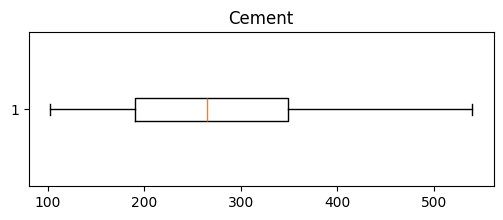

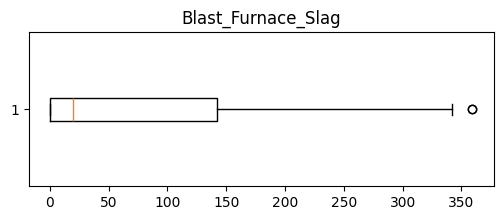

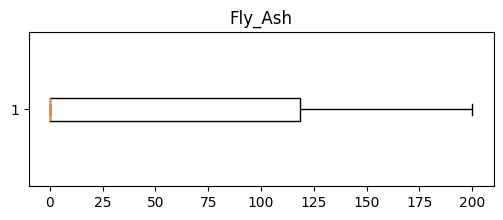

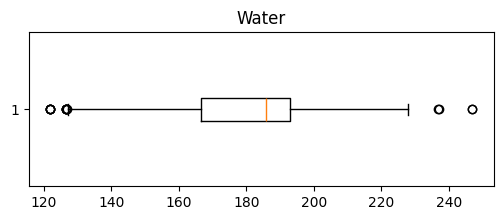

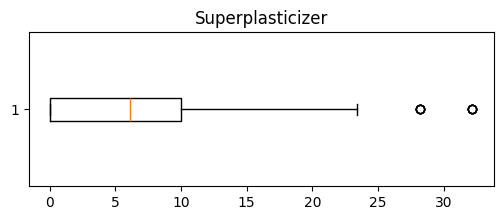

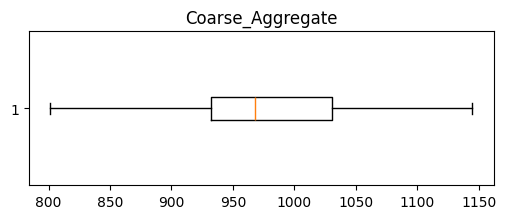

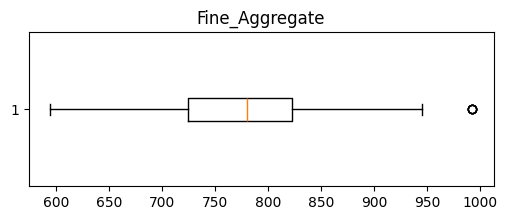

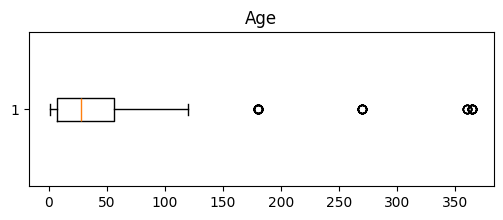

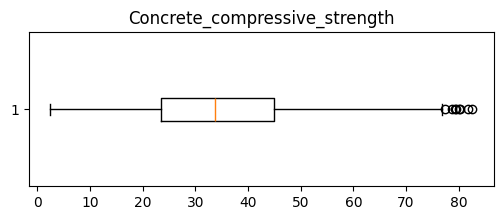

In [19]:
for i in df.columns:
    plt.figure(figsize=(6,2))
    plt.boxplot(df[i], vert = False)
    plt.title(i)
    plt.show()

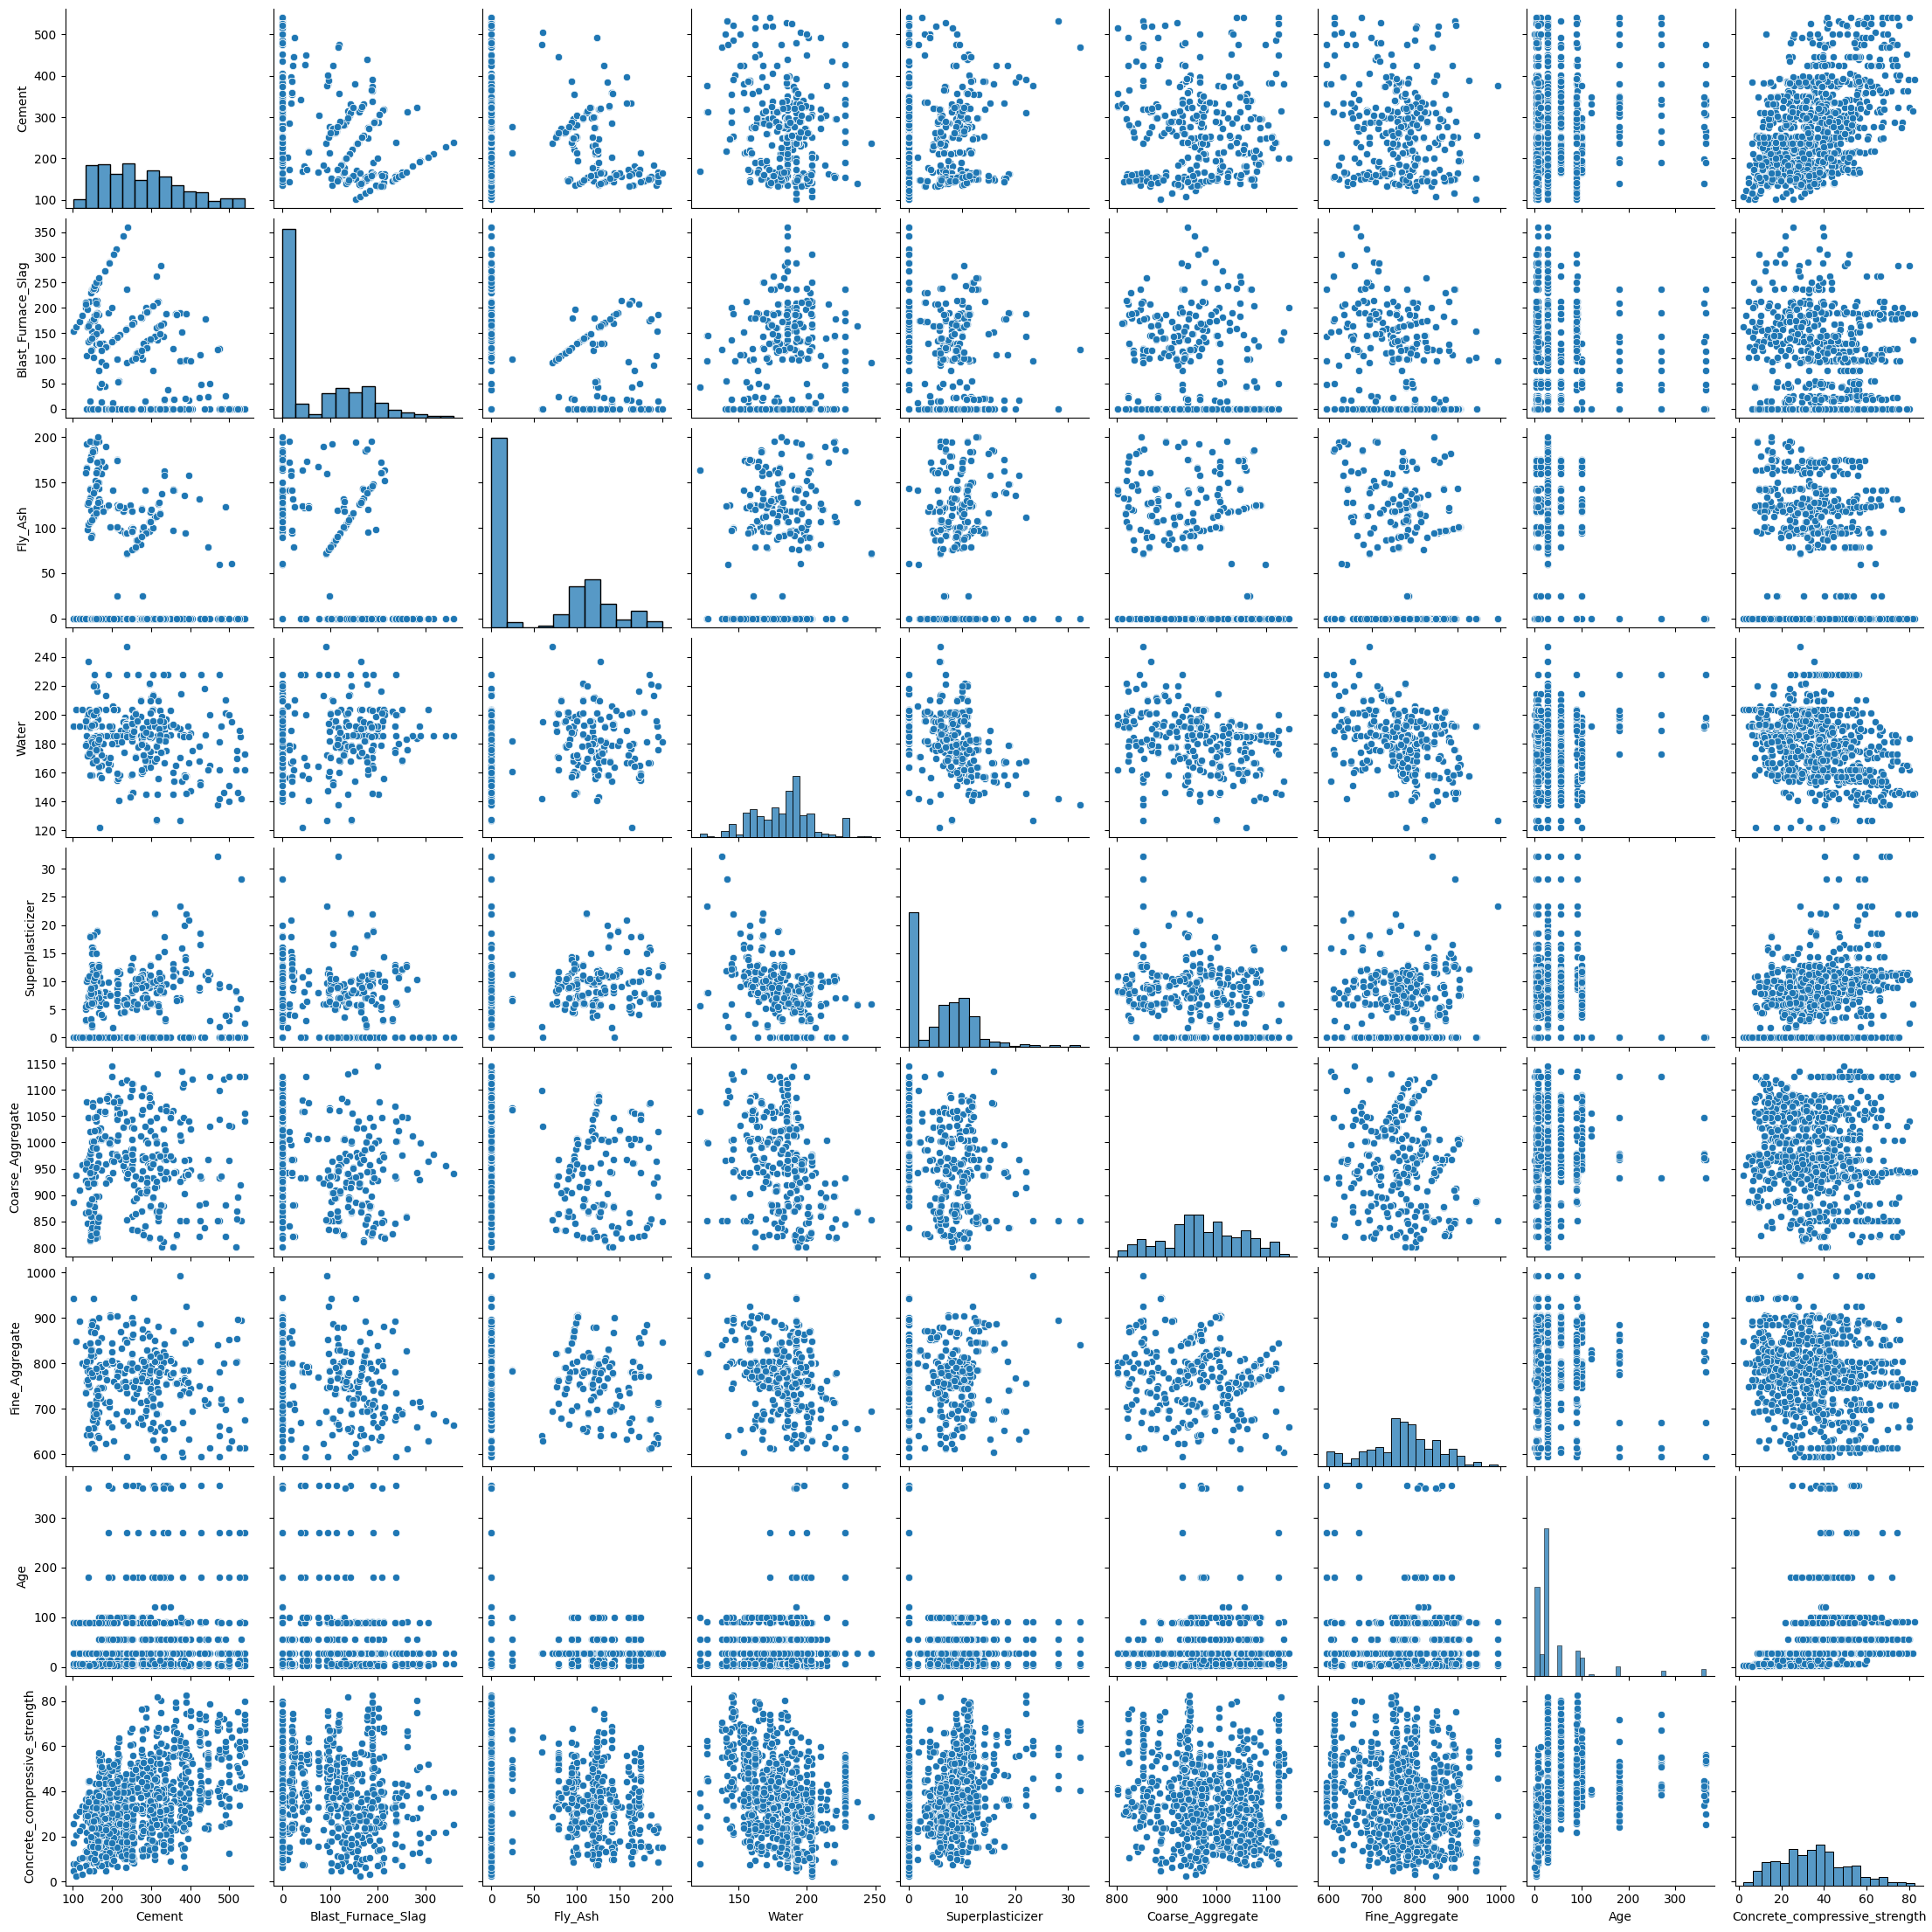

In [16]:
sns.pairplot(df)
plt.show()

In [17]:
df.corr()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
Cement,1.000000,-0.303301,-0.385618,-0.056583,0.061296,-0.086212,-0.245379,0.086349,0.488283
Blast_Furnace_Slag,-0.303301,1.000000,-0.312342,0.130295,0.019902,-0.277558,-0.289676,-0.042759,0.103370
Fly_Ash,-0.385618,-0.312342,1.000000,-0.283372,0.414055,-0.026485,0.090229,-0.158940,-0.080648
Water,-0.056583,0.130295,-0.283372,1.000000,-0.646875,-0.212495,-0.444888,0.279269,-0.269606
Superplasticizer,0.061296,0.019902,0.414055,-0.646875,1.000000,-0.242031,0.207794,-0.194094,0.344225
Coarse_Aggregate,-0.086212,-0.277558,-0.026485,-0.212495,-0.242031,1.000000,-0.162212,-0.005263,-0.144710
Fine_Aggregate,-0.245379,-0.289676,0.090229,-0.444888,0.207794,-0.162212,1.000000,-0.156572,-0.186457
Age,0.086349,-0.042759,-0.158940,0.279269,-0.194094,-0.005263,-0.156572,1.000000,0.337371
Concrete_compressive_strength,0.488283,0.103370,-0.080648,-0.269606,0.344225,-0.144710,-0.186457,0.337371,1.000000


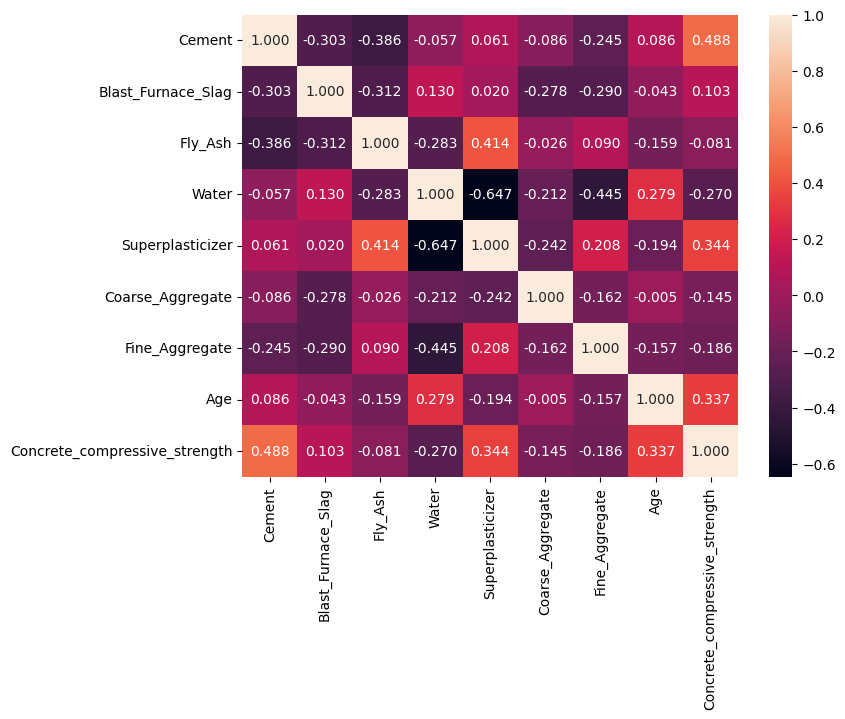

In [18]:
# Heatmap

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,fmt=".3f")
plt.show()

In [20]:
X = df.drop("Concrete_compressive_strength", axis = 1)
y = df["Concrete_compressive_strength"]

In [27]:
X_tr, X_te, y_tr, y_te = train_test_split(X , y, test_size = 0.25, random_state = 43)

In [28]:
scaler = StandardScaler()

In [29]:
X_tr[X_tr.columns[:-1]]

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate
468,213.50,0.0,174.24,159.21,11.66,1043.60,771.90
979,289.00,133.7,0.00,194.90,5.50,924.10,760.10
968,134.70,0.0,165.70,180.20,10.00,961.00,804.90
118,425.00,106.3,0.00,153.50,16.50,852.10,887.10
937,313.30,0.0,113.00,178.50,8.00,1001.90,688.70
...,...,...,...,...,...,...,...
301,290.35,0.0,96.18,168.08,9.41,961.18,865.00
842,151.00,0.0,184.00,167.00,12.00,991.00,772.00
279,251.37,0.0,118.27,188.45,6.35,1028.40,757.73
344,213.74,0.0,174.74,154.79,10.16,1053.50,776.35


In [30]:
Scaled_X_tr = scaler.fit_transform(X_tr)

In [31]:
Scaled_X_te = scaler.transform(X_te)

In [32]:
Scaled_X_tr

array([[-0.6175217 , -0.86447241,  1.87161837, ...,  0.92557341,
        -0.00719588,  0.79553313],
       [ 0.0938192 ,  0.70730654, -0.86628275, ..., -0.63138422,
        -0.15176424, -0.29282701],
       [-1.35995432, -0.86447241,  1.73742602, ..., -0.15061656,
         0.39710549, -0.29282701],
       ...,
       [-0.26072064, -0.86447241,  0.99213991, ...,  0.72753361,
        -0.18080043, -0.67072984],
       [-0.61526048, -0.86447241,  1.87947506, ...,  1.05455985,
         0.04732355, -0.67072984],
       [ 0.39531468, -0.86447241,  1.1450312 , ..., -1.33624956,
         0.09204173, -0.29282701]])

In [33]:
Scaled_X_te

array([[ 0.40473641, -0.86447241, -0.86628275, ...,  0.01875959,
         0.33707286, -0.5044526 ],
       [-1.08201317, -0.86447241,  2.27796664, ..., -1.6059485 ,
         0.90064446, -0.29282701],
       [-0.63099478, -0.86447241,  1.04477977, ...,  1.10797848,
         0.08371067,  0.13042415],
       ...,
       [ 1.57303139, -0.5823281 ,  0.37507508, ..., -0.07244295,
        -0.74106411,  0.13042415],
       [-0.56711542, -0.86447241,  1.08422038, ...,  1.38288899,
         0.27471244,  0.13042415],
       [-0.39140009,  1.9275807 , -0.86628275, ..., -0.52845565,
        -2.18674777, -0.61026539]])

In [36]:
y.min()

np.float64(2.331807832)

In [37]:
y.max()

np.float64(82.5992248)

In [38]:
min_max_scale = MinMaxScaler()

In [39]:
scaled_y_tr = min_max_scale.fit_transform(np.array(y_tr).reshape(len(y_tr),1))  # convert in 2d

In [40]:
scaled_y_te = min_max_scale.transform(np.array(y_te).reshape(len(y_te),1))

In [41]:
scaled_y_tr

array([[0.63072721],
       [0.54711471],
       [0.13656823],
       [0.72212201],
       [0.42947826],
       [0.46013503],
       [0.38909791],
       [0.89529111],
       [0.77202838],
       [0.1643818 ],
       [0.11379684],
       [0.23285059],
       [0.26729544],
       [0.52258242],
       [0.36152485],
       [0.47996014],
       [0.31883386],
       [0.18480819],
       [0.61545465],
       [0.36521844],
       [0.25681596],
       [0.51536704],
       [0.52988369],
       [0.09007198],
       [0.3827415 ],
       [0.37458125],
       [0.50193269],
       [0.05670944],
       [0.81557835],
       [0.0922366 ],
       [0.40988507],
       [0.25166211],
       [0.19514164],
       [0.43522479],
       [0.46043567],
       [0.26403134],
       [0.294439  ],
       [0.43403941],
       [0.56539367],
       [0.09076775],
       [0.16207116],
       [0.37913381],
       [0.07729045],
       [0.32274219],
       [0.08691096],
       [0.12719683],
       [0.12270439],
       [0.288

In [42]:
scaled_y_te

array([[0.22975828],
       [0.15896167],
       [0.39708636],
       [0.41638873],
       [0.2846467 ],
       [0.11860709],
       [0.38961329],
       [0.27052518],
       [0.68140666],
       [0.52026319],
       [0.32347232],
       [0.25398134],
       [0.39064406],
       [0.19557113],
       [0.40979917],
       [0.77950145],
       [0.12633785],
       [0.27076569],
       [0.37861843],
       [0.28955144],
       [0.47774399],
       [0.44699273],
       [0.38212304],
       [0.24066725],
       [0.24006597],
       [0.61045543],
       [0.34159666],
       [0.63986669],
       [0.44845299],
       [0.45970554],
       [0.48238245],
       [0.40292738],
       [0.09665172],
       [0.79315913],
       [0.86917831],
       [0.39202701],
       [0.2849044 ],
       [0.90156161],
       [0.62643234],
       [0.66414128],
       [0.67917332],
       [0.49021629],
       [0.10463159],
       [0.13939425],
       [0.52086447],
       [0.62900926],
       [0.63010016],
       [0.194

In [43]:
model = LinearRegression()

In [49]:
model.fit(Scaled_X_tr, scaled_y_tr)

LinearRegression()

In [51]:
y_pr = model.predict(Scaled_X_te)

In [53]:
# Model training score (only for training data)

training_score = model.score(Scaled_X_tr, scaled_y_tr)
training_score

0.5908757713018453

In [54]:
r2 = r2_score(scaled_y_te, y_pr)
r2

0.6303452314961497

In [74]:
# as per input columns (weights)
m = model.coef_
m

array([[ 0.15050544,  0.10715436,  0.0627096 , -0.03606091,  0.02338853,
         0.01653884,  0.02036157,  0.08760588]])

In [75]:
c = model.intercept_
c

array([0.40993353])

In [77]:
new_data = np.array([540.0,	0.0	, 0.0,	162.0	,2.5,	1040.0,	676.0,	28])

In [78]:
new_data

array([ 540. ,    0. ,    0. ,  162. ,    2.5, 1040. ,  676. ,   28. ])

In [80]:
m.T

array([[ 0.15050544],
       [ 0.10715436],
       [ 0.0627096 ],
       [-0.03606091],
       [ 0.02338853],
       [ 0.01653884],
       [ 0.02036157],
       [ 0.08760588]])

In [79]:
np.dot(m.ravel().T, new_data)+c

array([109.3172548])

In [86]:
Scaled_X_tr[0]

array([-0.6175217 , -0.86447241,  1.87161837, -1.06041171,  0.91291802,
        0.92557341, -0.00719588,  0.79553313])

In [81]:
scaled_y_tr[0]

array([0.63072721])

In [88]:
np.dot(m.ravel().T, Scaled_X_tr[0])+c

array([0.4861756])

In [90]:
mean_squared_error(scaled_y_te, y_pr)

0.01644662298156566

In [83]:
root_mean_squared_error(scaled_y_te, y_pr)

0.12824438771956323

In [84]:
scaled_y_te.mean()

np.float64(0.41063703164697707)